# HiMCM Session 7
# Other Prediction Methods

- **Multiple Linear Regression**: Predict the dependent variable based on a linear combination of independent variables.
- **Polynomial Regression**: Describe the relationship as a polynomial.
- **Logistic Regression**: Designed for classification tasks.

## Multiple Linear Regression

Multiple linear regression is an extension of linear regression. It aims to build a relationship between the dependent variable and multiple independent variables. We will use the following example to see how to conduct multiple linear regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The following "magic command" allows figures to be displayed automatically
%matplotlib inline

In [18]:
# Load the insurance prices data set.
# url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
# insurance = pd.read_csv(url)
filename='C:\\Users\\lzhao\\Dropbox (Personal)\\Teaching\\MathematicalModeling\\insurance.csv'
filename=r'C:\Users\lzhao\Dropbox (Personal)\Teaching\MathematicalModeling\insurance.csv'

insurance = pd.read_csv(filename, index_col=0)
insurance.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To get a feel for the data, it is common to do some quick exploratory analysis.

In [19]:
# Size of data
print(insurance.shape)

(1338, 7)


In [20]:
# Variable names, data types, and missing values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [21]:
# Distribution of categorical variables
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:>

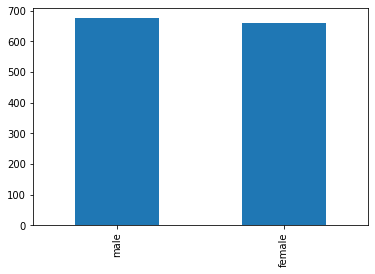

In [22]:
insurance['sex'].value_counts().plot.bar()

In [23]:
# Visualize the distribution of `smoker` and `region`.



In [24]:
# Descriptive statistics on numerical variables
# BMI: body mass index
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


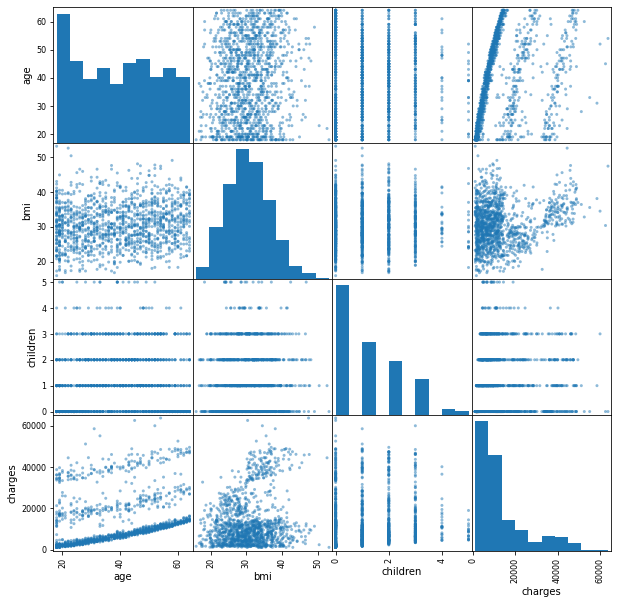

In [25]:
# Distribution of data
pd.plotting.scatter_matrix(insurance, figsize=(10, 10))
plt.show()

Which variable has a linear relationship with `charges`?

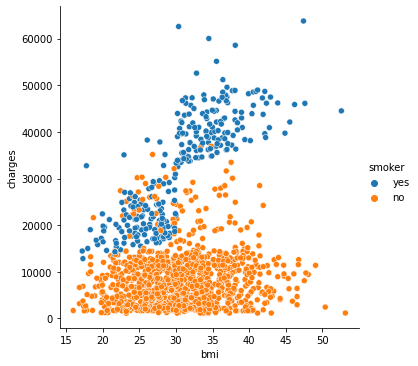

In [26]:
# Use relplot from the seaborn library to inspect the data more closely
import seaborn as sns
sns.relplot(x = "bmi", y="charges", hue ="smoker",data=insurance)
# plt.show()

In [ ]:
# Exercise: Use Seaborn to make a scatter plot with age on the x axis and
# charges on the y axis, colored by whether the person is a smoker.



Let's build a multiple linear regression model.

In [27]:
import statsmodels.formula.api as smf

model1 = smf.ols('charges ~ age + bmi + children', data = insurance).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           8.80e-37
Time:                        23:03:48   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- What is the equation of this linear model?
- Is the R^2 value good?
- Could any of the coefficients be 0?
- Are the residuals follow a normal distribution?
- Are the predicted values close to the actual values?

In [ ]:
model1.resid.hist(bins = 20)

In [ ]:
plt.scatter(x = insurance["charges"], y = model1.fittedvalues)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")

Let's add the remaining columns. For categorical variables, we need to convert them to quantitative data using **dummy variables**.

In [ ]:
insurance_new = pd.get_dummies(insurance, columns=["sex"], drop_first=True)
insurance_new.head()

In [ ]:
# Exercise: Convert "smoker" and "region" to quantitative columns.



In [ ]:
# Exercise: Build a lienar regression model using all these columns.



Evaluate the performance of this linear model.

## Polynomial Regression

If the relationship is not linear, we can use a polynomial to fit the data. A polynomial curve is more flexible since it has more parameters.

In [ ]:
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv"
# wage = pd.read_csv(url)
wage = pd.read_csv(url, usecols=['age', 'wage'])
wage.head()

In [ ]:
plt.plot(wage['age'], wage['wage'], 'b.', alpha=0.1)

In [ ]:
model = smf.ols('wage ~ age + I(age**2) + I(age**3)', wage).fit()
model.summary()

In [ ]:
# Visualize the model
pred = model.fittedvalues
plt.plot(wage['age'], pred, 'gs', alpha=0.1)
plt.plot(wage['age'], wage['wage'], 'b.', alpha=0.1)

## Logistic Regression

The Challenger Space Shuttle tragically explored in 1986, killing all astronauts on board. The explosion was shown to have been caused by an O-ring failure, likely due to cold temperatures the day of the launch.

<img src="https://www.history.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTU3ODc4NTk5MjI2NTY1OTYx/image-placeholder-title.jpg" width="300">

Below is the test data of this O-ring under a variety of temperatures:

In [ ]:
url = "http://comet.lehman.cuny.edu/owen/teaching/mat328/chall.txt"
data = pd.read_csv(url,
                   sep="\s+",
                   header=None,
                   names=["Temperature", "Failure"])
# data.sort_values(by='Temperature', inplace=True)
# data.reset_index(drop=True, inplace=True)
data

In [ ]:
# Plot the data
data.plot.scatter(x="Temperature", y="Failure")

On the launch day, the temperature was 30 degree Fahrenheit. How likely will this O-ring fail?

A **logistic regression** model aims to predict the probability of a event given a group of independent variables. Let's apply this method.

In [ ]:
logistic_model = smf.logit('Failure ~ Temperature',data).fit()
logistic_model.summary()

In [ ]:
# Graph the model as a probability curve.
x = np.linspace(50, 85, 200) # sample 200 evenly-spaced values in [50, 85]
params = logistic_model.params
logits = params['Intercept'] + x * params['Temperature']
probs = np.exp(logits) / (1 + np.exp(logits))

data.plot.scatter(x = "Temperature", y = "Failure")
plt.plot(x, probs)


In [ ]:
test = pd.DataFrame({"Temperature":[30]})
test

In [ ]:
logistic_model.predict(test)